In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

**ĐỌC DỮ LIỆU VÀ KIỂM TRA DỮ LIỆU**

In [3]:
# Đường dẫn đến tập dữ liệu
data_path = r'/content/handwritten'
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [4]:
# Hàm đọc dữ liệu từ tập tin .gz
def read_mnist(images_path, labels_path):
    import gzip

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 28, 28, 1)

    return images, labels

In [5]:
# Đọc dữ liệu huấn luyện và kiểm tra
train_images, train_labels = read_mnist(train_images_path, train_labels_path)
test_images, test_labels = read_mnist(test_images_path, test_labels_path)

In [6]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


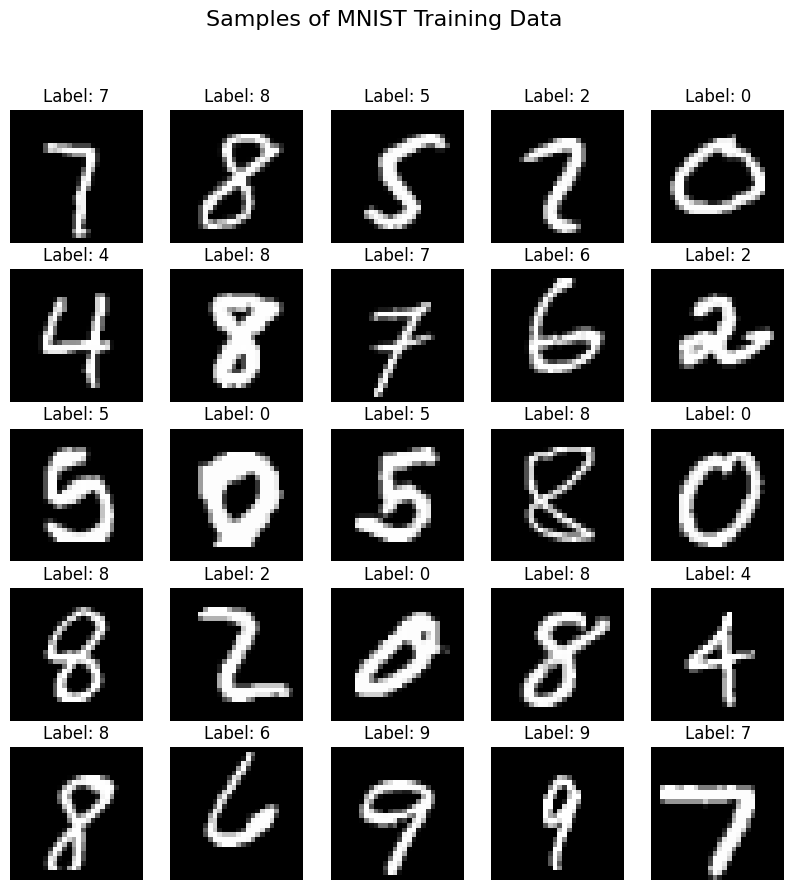

In [7]:
# Chọn một số mẫu ngẫu nhiên từ tập dữ liệu huấn luyện để hiển thị
num_samples = 25
random_indices = np.random.choice(train_images.shape[0], num_samples, replace=False)
sample_images = train_images[random_indices]

# Hiển thị các mẫu ảnh trong lưới
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i][:, :, 0], cmap='gray')
    plt.title(f"Label: {train_labels[random_indices[i]]}")
    plt.axis('off')
plt.suptitle('Samples of MNIST Training Data', fontsize=16)
plt.show()

**SOFTMAX REGRESSION**

In [9]:
def convert_labels(y, C):
  from scipy import sparse
  Y = sparse.coo_matrix((np.ones_like(y),
  (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
  return Y
def softmax(Z):
  e_Z = np.exp(Z)
  A = e_Z / e_Z.sum(axis = 0)
  return A
def softmax_stable(Z):
  e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
  A = e_Z / e_Z.sum(axis = 0)
  return A
def pred(W, X):
  A = softmax_stable(W.T.dot(X))
  return np.argmax(A, axis = 0)

In [10]:
def _softmax_regression(X, Y, theta, lambda_=0.5, iterations=20, learning_rate=1e-5, batch_size=200):
  from sklearn.metrics import log_loss
  losses = []
  _theta = theta
  d, N = X.shape
  for iter_ in range(iterations):
    shuffle_index = np.random.permutation(N)
    for i in shuffle_index:
      xi = X[:, i].reshape(d, 1)
      yi = Y[:, i].reshape(10, 1)
      ai = softmax_stable(np.dot(_theta.T, xi))
      _theta += learning_rate * xi.dot((yi - ai).T)
      if (iter_ * N + i) % batch_size == 0:
        Y_hat = np.dot(_theta.T, X)
        losses.append(log_loss(Y, Y_hat))
    Y_hat = np.dot(_theta.T, X)
    print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}")
  return _theta, losses

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], -1).T
y_train = convert_labels(y_train, 10)
theta = np.zeros((X_train.shape[0], 10))
opt_theta, losses = _softmax_regression(X_train, y_train, theta)
print('Training success: ', opt_theta.shape, len(losses))

epoch 0 - cost 1.0163504001700547
epoch 1 - cost 1.01557508476053
epoch 2 - cost 1.0131148691973992
epoch 3 - cost 1.0154724517081963
epoch 4 - cost 1.0154957338762516
epoch 5 - cost 1.013306929621141
epoch 6 - cost 1.0153202708597278
epoch 7 - cost 1.011171947836129
epoch 8 - cost 1.0143123098421556
epoch 9 - cost 1.0168366982047927
epoch 10 - cost 1.0113909049552356
epoch 11 - cost 1.0119119508850642
epoch 12 - cost 1.0084982366314523
epoch 13 - cost 1.012712404464228
epoch 14 - cost 1.0106750682972667
epoch 15 - cost 1.0137395102038105
epoch 16 - cost 1.0113749646936314
epoch 17 - cost 1.01238643108035
epoch 18 - cost 1.0108499380180551
epoch 19 - cost 1.0113595412201373
Training success:  (784, 10) 4800


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], -1).T
print('accuracy training data: ', accuracy_score(y_train,
pred(opt_theta, X_train)))

X_val = X_val.reshape(X_val.shape[0], -1).T

print(X_val.shape)
print('accuracy testing data: ', accuracy_score(y_val,pred(opt_theta, X_val)))

conf_matrix = confusion_matrix(y_val, pred(opt_theta, X_val))
print('Confusion Matrix:\n', conf_matrix)

precision = precision_score(y_val, pred(opt_theta, X_val), average='macro')
recall = recall_score(y_val, pred(opt_theta, X_val), average='macro')

print('Precision:', precision)
print('Recall:', recall)


accuracy training data:  0.9025208333333333
(784, 12000)
accuracy testing data:  0.8904166666666666
Confusion Matrix:
 [[1089    0   43    1    3   21    9    0    6    3]
 [   0 1273   12    4    2   13    1    2   15    0]
 [   1   14 1093    4   11   12    9    9   18    3]
 [   2    9   65  973    1   89    3    9   51   17]
 [   5    2   13    0 1075    8   12    2    6   53]
 [  10    4   24   17    8  994   13    0   24   10]
 [   6    1   61    1   11   40 1055    0    2    0]
 [   6   11   27   11   26    6    0 1123    2   87]
 [   8   25   41   13    5   93   18    1  933   23]
 [   2    5   10   12   38   19    0   19   12 1077]]
Precision: 0.8941137863463393
Recall: 0.8900599977043162
